# Project Description

## Overview
This project focuses on building a robust image classification system to identify various types of skin conditions from dermoscopic images. By leveraging machine learning and deep learning techniques, the model aims to assist medical professionals in diagnosing skin cancer and other skin-related diseases with higher accuracy and efficiency.

## What is Skin Cancer?
Skin cancer is a condition where abnormal skin cells grow uncontrollably, often due to excessive exposure to ultraviolet (UV) radiation or other environmental factors. It is one of the most common types of cancer but can be effectively treated if detected early. Skin cancer can be broadly classified into two main categories:

1. **Non-Melanoma Skin Cancer (NMSC):** Includes Basal Cell Carcinoma (BCC) and Squamous Cell Carcinoma (SCC).
2. **Melanoma:** A more aggressive and dangerous form of skin cancer that arises from pigment-producing melanocytes.

### Causes of Skin Cancer
- Prolonged exposure to UV radiation from the sun or artificial sources like tanning beds.
- Family history of skin cancer.
- Fair skin, light hair, and light eyes, which provide less natural protection against UV radiation.
- A history of sunburns, especially during childhood.
- Immune suppression due to medical conditions or treatments.

## Types of Skin Conditions and Classes
The project categorizes skin conditions into the following types:

### 1. **Melanoma (MEL)**
   - Melanoma is a dangerous form of skin cancer originating in melanocytes. It is characterized by irregularly shaped and colored moles or lesions.
   - **Causes:** UV exposure, genetic predisposition, and environmental factors.
   -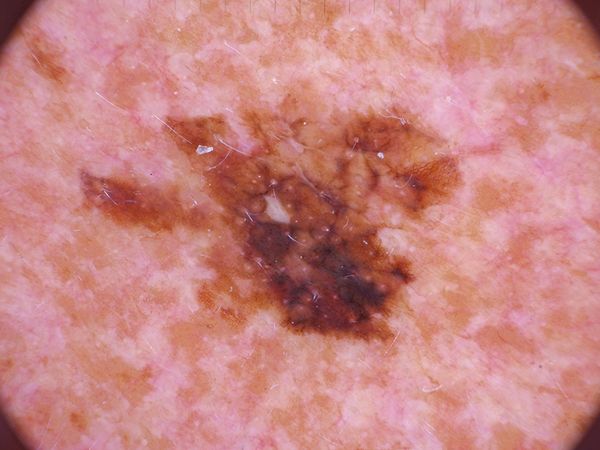

### 2. **Nevus (NV)**
   - Commonly known as moles, these are benign growths of melanocytes and are usually harmless.
   - **Causes:** Genetic factors and sun exposure.
   - 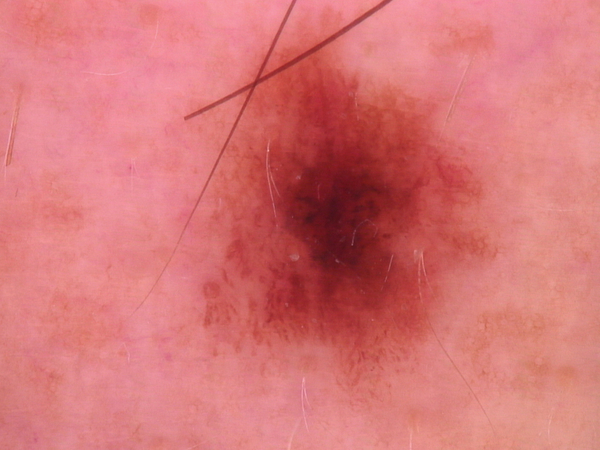

### 3. **Basal Cell Carcinoma (BCC)**
   - The most common type of skin cancer, often appearing as small, shiny bumps or red patches.
   - **Causes:** Chronic sun exposure and skin damage.
   - 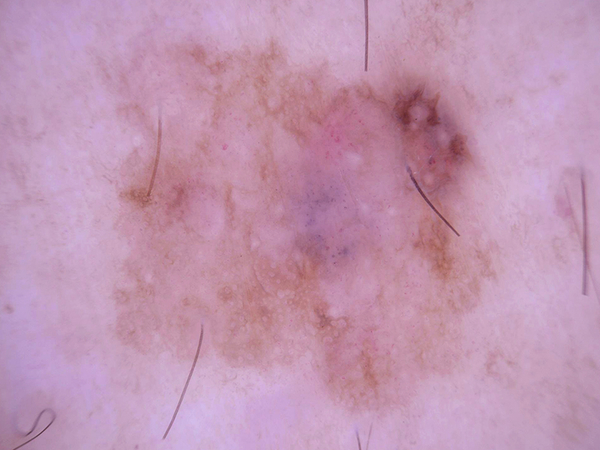

### 4. **Actinic Keratosis and Intraepithelial Carcinoma (AKIEC)**
   - A precancerous skin condition caused by sun damage, often appearing as scaly or crusty patches.
   - **Causes:** Long-term UV radiation exposure.
   - 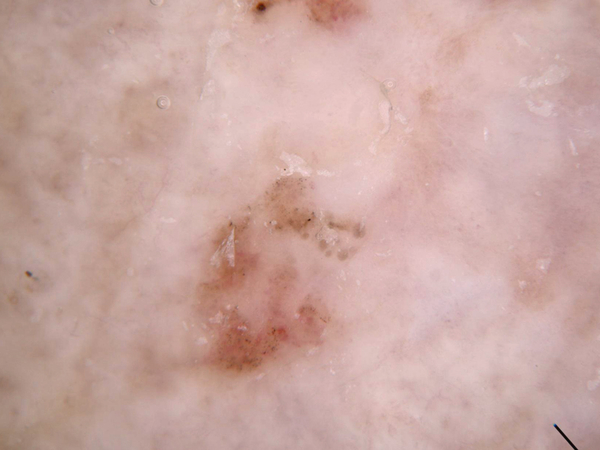

### 5. **Benign Keratosis (BKL)**
   - Non-cancerous growths such as seborrheic keratosis or solar lentigo, appearing as dark, waxy spots.
   - **Causes:** Age, genetics, and sun exposure.
   - 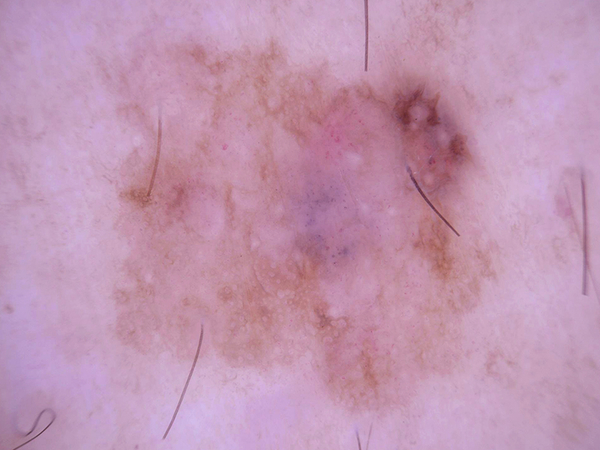


## Objectives
- **Data Preparation:** Classify and organize dermoscopic images into the respective categories.
- **Model Development:** Develop and train machine learning models to accurately identify skin conditions.
- **Analysis:** Evaluate the model’s performance and refine it for better diagnostic capability.

This project aims to bridge the gap in early detection and diagnosis of skin conditions, ensuring timely treatment and reducing the mortality rate associated with skin cancer.



# **Step 01- Data Importing**

## **Install Kaggle Library**

In [ ]:
# Step 1: Install the Kaggle library
!pip install -q kaggle

## **Download the Data Set**

In [ ]:

# Step 2: Upload the kaggle.json file (This will prompt you to choose your file)
from google.colab import files
files.upload()

# Step 3: Move kaggle.json to the proper directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Step 4: Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Step 5: Download the dataset
# This is the specific dataset URL and ID you provided from Kaggle
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification

# Step 6: Unzip the downloaded dataset
!unzip ham1000-segmentation-and-classification.zip -d ./ham1000_data

Streaming output truncated to the last 5000 lines.
  inflating: ./ham1000_data/masks/ISIC_0029321_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029322_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029323_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029324_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029325_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029326_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029327_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029328_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029329_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029330_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029331_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029332_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029333_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029334_segmentation.png  
  inflating: ./ham1000_da

# **Preparing the Data Set**



This script organizes skin cancer images into class-specific folders, limiting the number of NV class images to 1500 in a new destination folder, while processing other classes without restrictions.

In [ ]:
import os
import shutil
import pandas as pd

# Load the ground truth data
df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')

# Define paths
source_folder = '/content/ham1000_data/images'

new_destination_folder = '/content/ham1000_data/classifiedImagesNew'

# Create destination folders for each class in the original and new destinations
classes = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL' ]
for class_name in classes:

    os.makedirs(os.path.join(new_destination_folder, class_name), exist_ok=True)

# Track the count of images moved for the NV class
nv_count = 0
nv_limit = 1500

# Iterate over each row in the dataframe and move files based on class labels
for index, row in df.iterrows():
    # Get image name and class labels
    image_name = row['image'] + '.jpg'
    image_path = os.path.join(source_folder, image_name)

    # Check if the image exists in the source folder
    if not os.path.exists(image_path):
        continue

    # Move image to the corresponding class folder based on label
    for class_name in classes:
        if row[class_name] == 1.0:  # If the label is 1 for the class
            if class_name == 'NV':
                if nv_count < nv_limit:  # Restrict to 1500 NV images

                    new_dest_path = os.path.join(new_destination_folder, class_name, image_name)

                    shutil.copy(image_path, new_dest_path)  # Copy image to the new destination folder
                    nv_count += 1
            elif class_name != 'NV':  # Process other classes without restriction

                new_dest_path = os.path.join(new_destination_folder, class_name, image_name)

                shutil.copy(image_path, new_dest_path)  # Copy image to the new destination folder




**Count the number of images in each folder**

In [ ]:
import os

new_destination_folder = '/content/ham1000_data/classifiedImagesNew'
classes = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL']

# Count and print the number of images in each folder
print(f"Counting images in: {new_destination_folder}")
for class_name in classes:
    folder_path = os.path.join(new_destination_folder, class_name)
    # print(f"Checking folder: {folder_path}")
    if os.path.exists(folder_path):
        #try:
            image_count = len(os.listdir(folder_path))
            print(f"{class_name} : {image_count} ")
       # except Exception as e:
            #print(f"Error reading folder {folder_path}: {e}")
    #else:
    #  print
       # print(f"Folder for class {class_name} does not exist: {folder_path}")

print("Images have been separated into respective class folders.")


Counting images in: /content/ham1000_data/classifiedImagesNew
MEL : 1113 
NV : 1500 
BCC : 514 
AKIEC : 327 
BKL : 1099 
Images have been separated into respective class folders.


# Results

## CNN

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('fivethirtyeight')

In [ ]:


# Define the path to the dataset folder
dataset_path = "/content/ham1000_data/classifiedImagesNew"


# Define the list of label folders in the dataset folder
label_folders = ['MEL', 'NV',  'BKL' ]

# Define the size of the input images
img_height = 128
img_width = 128

# Define an empty list to store the images and their labels
data = []
labels = []

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)
        labels.append(label_folder)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels)

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (3712, 128, 128, 3)
Labels shape: (3712,)


In [ ]:


# Get the unique string values
unique_values = np.unique(labels)

# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Map the string values to numbers
mapped_arr = np.array([mapping[value] for value in labels])

print("Original array:", labels)
print("Mapped array:", mapped_arr)
print("Mapping dictionary:", mapping)


Original array: ['MEL' 'MEL' 'MEL' ... 'BKL' 'BKL' 'BKL']
Mapped array: [1 1 1 ... 0 0 0]
Mapping dictionary: {'BKL': 0, 'MEL': 1, 'NV': 2}


### **Train Test Split**

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(data,mapped_arr, test_size = 0.2,random_state=0,shuffle=True)

In [ ]:

input_shape = (128, 128,3)

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.02),
    layers.Flatten(),
    #layers.Dense(8, activation = 'relu'),
    layers.Dense(3, activation= 'softmax'),
])
#model.build(input_shape=input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │         345,603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,251 (1.61 MB)

 Trainable params: 421,251 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, to_categorical(Y_train, num_classes=3), epochs=20, validation_split=0.1)


Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - Precision: 0.4277 - Recall: 0.2009 - accuracy: 0.3866 - loss: 154.6699 - val_Precision: 0.7440 - val_Recall: 0.3131 - val_accuracy: 0.4411 - val_loss: 0.9350
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - Precision: 0.7542 - Recall: 0.2347 - accuracy: 0.4823 - loss: 0.9596 - val_Precision: 0.6011 - val_Recall: 0.3704 - val_accuracy: 0.5118 - val_loss: 1.0993
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - Precision: 0.7488 - Recall: 0.2487 - accuracy: 0.5762 - loss: 0.9260 - val_Precision: 0.7870 - val_Recall: 0.2862 - val_accuracy: 0.5892 - val_loss: 0.8917
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - Precision: 0.7882 - Recall: 0.3200 - accuracy: 0.6194 - loss: 0.8426 - val_Precision: 0.7500 - val_Recall: 0.2929 - val_accuracy: 0.6061 - val_loss: 0.8599
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - Precision: 0.7466 - Recall: 0.3102 - accuracy: 0.6218 - loss: 0.8901 - val_Precision: 0.7619 - val_Recall: 

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=3))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - Precision: 0.7091 - Recall: 0.2886 - accuracy: 0.5614 - loss: 1.0475


[1.000992774963379, 0.5558546185493469, 0.694915235042572, 0.2759084701538086]

In [ ]:
pred= model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [ ]:
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.43      0.84      0.57       214
           1       0.59      0.29      0.39       242
           2       0.78      0.57      0.66       287

    accuracy                           0.56       743
   macro avg       0.60      0.57      0.54       743
weighted avg       0.62      0.56      0.55       743



array([[179,  28,   7],
       [134,  70,  38],
       [102,  21, 164]])

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss from a Keras model's training history.

    Parameters:
    history (History): The history object returned by the `fit` method of a Keras model.

    Returns:
    None: Displays the plots for accuracy and loss.
    """
    # Extracting history data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    # Plotting Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend(loc='lower right')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Plotting Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()


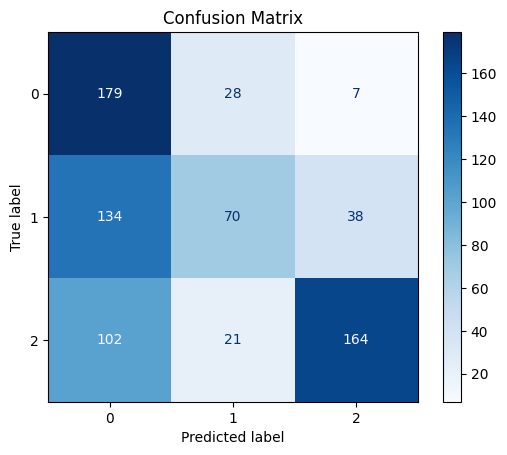

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

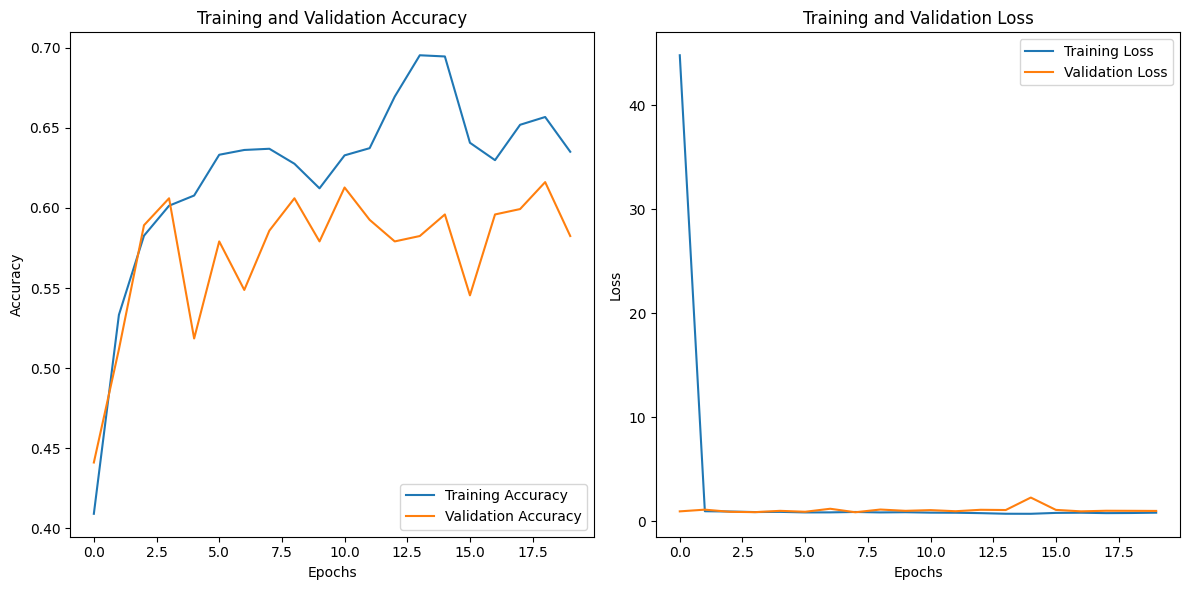

In [ ]:
plot_training_history(history)

## CNN with adam less Learning Rate

In [ ]:

from tensorflow.keras.optimizers import Adam
input_shape = (128, 128,3)

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.02),
    layers.Flatten(),
    #layers.Dense(8, activation = 'relu'),
    layers.Dense(3, activation= 'softmax'),
])
# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │         345,603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,251 (1.61 MB)

 Trainable params: 421,251 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, to_categorical(Y_train, num_classes=3), epochs=20, validation_split=0.1)


Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - Precision: 0.4353 - Recall: 0.4316 - accuracy: 0.4365 - loss: 4.6623 - val_Precision: 0.5831 - val_Recall: 0.5791 - val_accuracy: 0.5825 - val_loss: 2.1556
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - Precision: 0.4997 - Recall: 0.4955 - accuracy: 0.4969 - loss: 3.4505 - val_Precision: 0.6143 - val_Recall: 0.6061 - val_accuracy: 0.6162 - val_loss: 1.6896
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - Precision: 0.5410 - Recall: 0.5366 - accuracy: 0.5382 - loss: 3.0542 - val_Precision: 0.6357 - val_Recall: 0.6229 - val_accuracy: 0.6229 - val_loss: 1.8325
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - Precision: 0.5410 - Recall: 0.5327 - accuracy: 0.5381 - loss: 2.8180 - val_Precision: 0.6382 - val_Recall: 0.6296 - val_accuracy: 0.6296 - val_loss: 1.8317
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - Precision: 0.5641 - Recall: 0.5565 - accuracy: 0.5594 - loss: 2.5413 - val_Precision: 0.6429 - val_Recall: 0.6

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=3))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - Precision: 0.6901 - Recall: 0.6758 - accuracy: 0.6825 - loss: 1.2463


[1.3606239557266235,
 0.6716015934944153,
 0.6757866144180298,
 0.6648721694946289]

In [ ]:
pred= model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       214
           1       0.57      0.75      0.65       242
           2       0.94      0.60      0.73       287

    accuracy                           0.67       743
   macro avg       0.71      0.68      0.67       743
weighted avg       0.72      0.67      0.68       743



array([[146,  62,   6],
       [ 56, 182,   4],
       [ 38,  78, 171]])

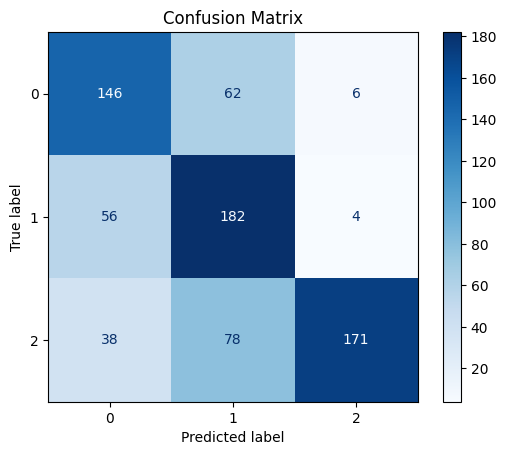

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

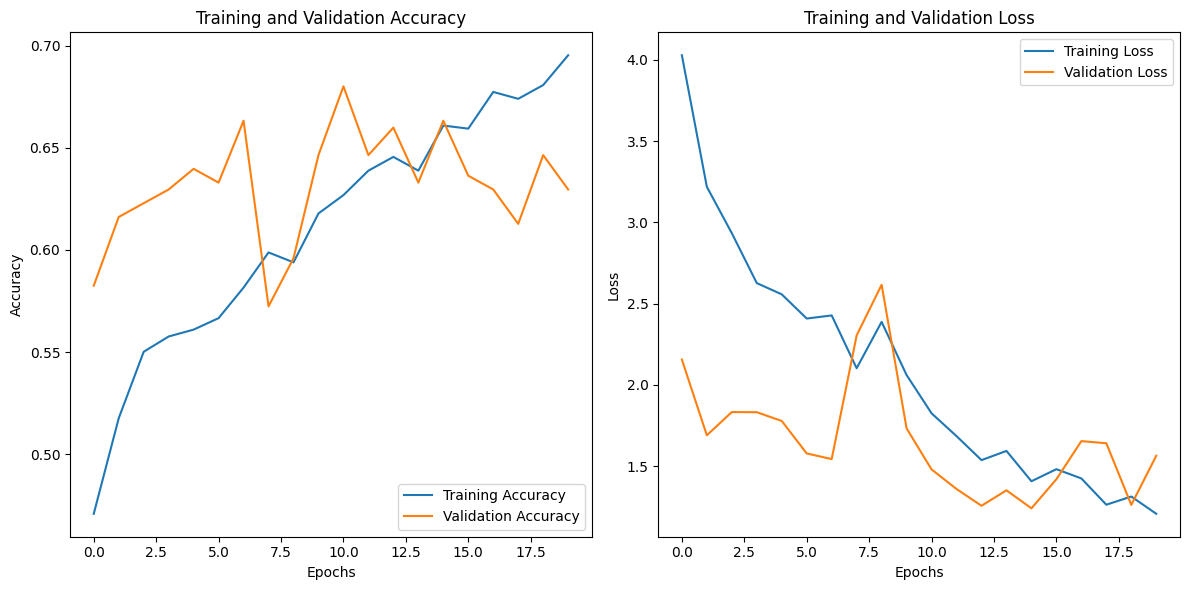

In [ ]:
plot_training_history(history)

## VGG-16

In [ ]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
# summarize the model
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:

from tensorflow.keras.optimizers import Adam


# Freeze base model initially
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])


# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,846,787 (56.64 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
VGG_history=model.fit(X_train, to_categorical(Y_train, num_classes=3), epochs=20,validation_split=0.1)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - Precision: 0.3985 - Recall: 0.3930 - accuracy: 0.3968 - loss: 5.4546 - val_Precision: 0.4655 - val_Recall: 0.4545 - val_accuracy: 0.4579 - val_loss: 2.7918
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - Precision: 0.3939 - Recall: 0.3894 - accuracy: 0.3912 - loss: 4.9135 - val_Precision: 0.4770 - val_Recall: 0.4545 - val_accuracy: 0.4747 - val_loss: 2.2779
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - Precision: 0.4279 - Recall: 0.4247 - accuracy: 0.4280 - loss: 4.7626 - val_Precision: 0.5121 - val_Recall: 0.4983 - val_accuracy: 0.5118 - val_loss: 1.9850
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - Precision: 0.4194 - Recall: 0.4125 - accuracy: 0.4187 - loss: 4.7482 - val_Precision: 0.5509 - val_Recall: 0.5286 - val_accuracy: 0.5421 - val_loss: 1.8447
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - Precision: 0.4447 - Recall: 0.4401 - accuracy: 0.4445 - loss: 4.4044 - val_Precision: 0.5556 - val_Recall: 0.

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=3))

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - Precision: 0.6621 - Recall: 0.6426 - accuracy: 0.6523 - loss: 1.4363


[1.547521710395813, 0.6325706839561462, 0.6420612931251526, 0.6204575896263123]

In [ ]:
pred= model.predict(X_test)
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       214
           1       0.63      0.55      0.58       242
           2       0.69      0.78      0.74       287

    accuracy                           0.63       743
   macro avg       0.62      0.62      0.62       743
weighted avg       0.63      0.63      0.63       743



array([[113,  42,  59],
       [ 70, 132,  40],
       [ 26,  36, 225]])

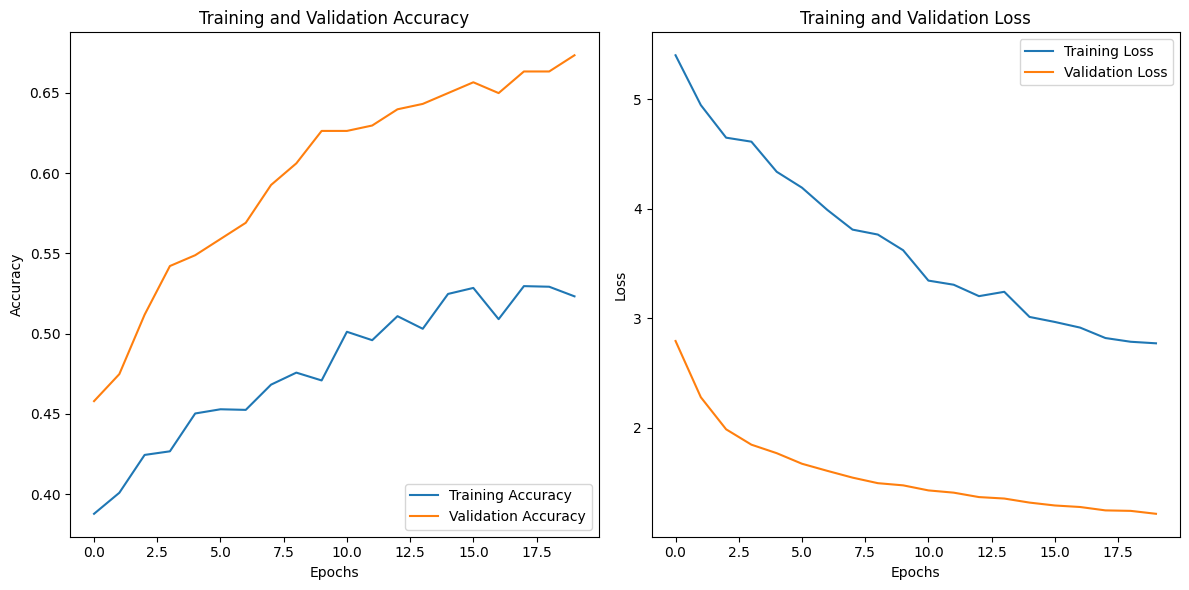

In [ ]:
plot_training_history(VGG_history)

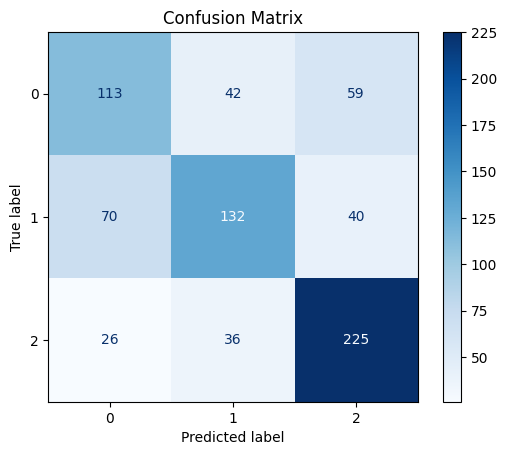

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Rest Net

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:



# Freeze base model initially
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])


# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## **MOdel Training**

In [ ]:
RessNet_history=model.fit(X_train, to_categorical(Y_train, num_classes=3), epochs=20,validation_split=0.1)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - Precision: 0.3434 - Recall: 0.2963 - accuracy: 0.3529 - loss: 1.7675 - val_Precision: 0.5632 - val_Recall: 0.3300 - val_accuracy: 0.5320 - val_loss: 1.0554
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - Precision: 0.4316 - Recall: 0.3561 - accuracy: 0.4162 - loss: 1.3835 - val_Precision: 0.7062 - val_Recall: 0.5017 - val_accuracy: 0.6229 - val_loss: 0.9154
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - Precision: 0.5080 - Recall: 0.4129 - accuracy: 0.4862 - loss: 1.1951 - val_Precision: 0.7220 - val_Recall: 0.5421 - val_accuracy: 0.6263 - val_loss: 0.8460
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - Precision: 0.5596 - Recall: 0.4604 - accuracy: 0.5232 - loss: 1.1187 - val_Precision: 0.7205 - val_Recall: 0.5556 - val_accuracy: 0.6263 - val_loss: 0.8098
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - Precision: 0.5821 - Recall: 0.4832 - accuracy: 0.5527 - loss: 1.0378 - val_Precision: 0.7241 - val_Recall: 0.

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=3))

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - Precision: 0.7589 - Recall: 0.6217 - accuracy: 0.6847 - loss: 0.6775


[0.7010469436645508,
 0.6796770095825195,
 0.7374392151832581,
 0.6123822331428528]

In [ ]:
pred= model.predict(X_test)
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       214
           1       0.66      0.55      0.60       242
           2       0.76      0.83      0.80       287

    accuracy                           0.68       743
   macro avg       0.67      0.67      0.67       743
weighted avg       0.68      0.68      0.68       743



array([[133,  44,  37],
       [ 72, 133,  37],
       [ 24,  24, 239]])

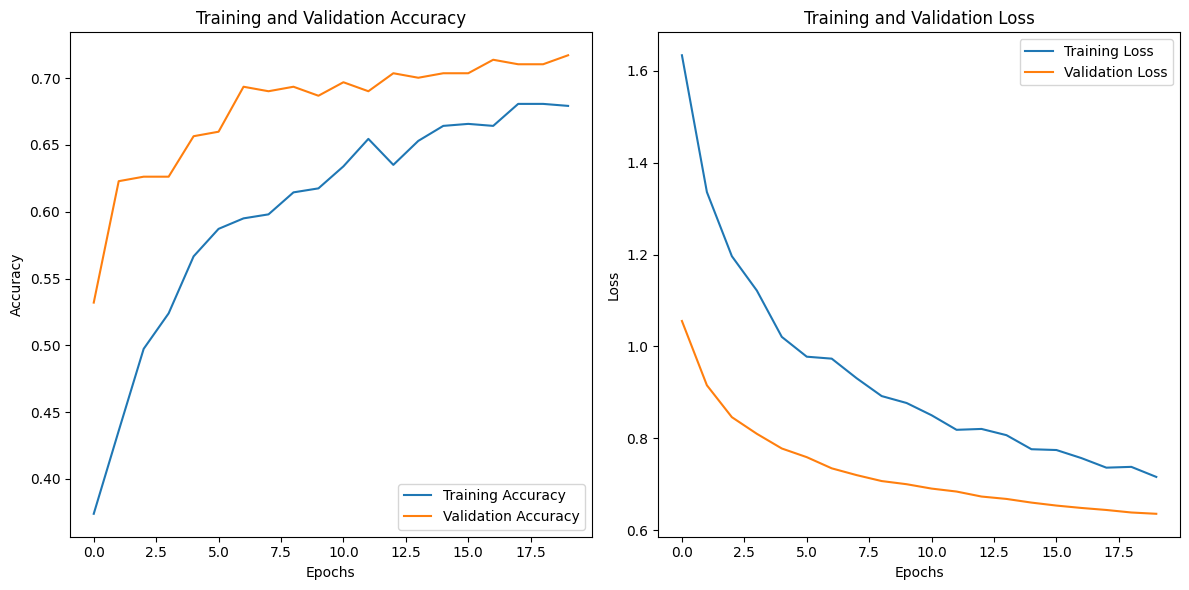

In [ ]:
plot_training_history(RessNet_history)

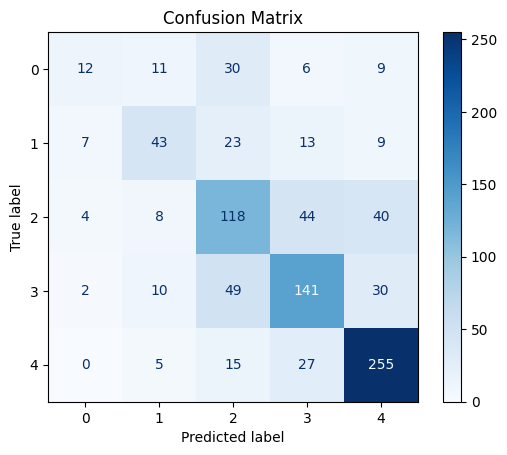

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Results

## CNN

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('fivethirtyeight')

In [ ]:


# Define the path to the dataset folder
dataset_path = "/content/ham1000_data/classifiedImagesNew"


# Define the list of label folders in the dataset folder
label_folders = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL' ]

# Define the size of the input images
img_height = 128
img_width = 128

# Define an empty list to store the images and their labels
data = []
labels = []

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)
        labels.append(label_folder)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels)

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (4553, 128, 128, 3)
Labels shape: (4553,)


In [ ]:


# Get the unique string values
unique_values = np.unique(labels)

# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Map the string values to numbers
mapped_arr = np.array([mapping[value] for value in labels])

print("Original array:", labels)
print("Mapped array:", mapped_arr)
print("Mapping dictionary:", mapping)


Original array: ['MEL' 'MEL' 'MEL' ... 'BKL' 'BKL' 'BKL']
Mapped array: [3 3 3 ... 2 2 2]
Mapping dictionary: {'AKIEC': 0, 'BCC': 1, 'BKL': 2, 'MEL': 3, 'NV': 4}


In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(data,mapped_arr, test_size = 0.2,random_state=0,shuffle=True)

In [ ]:

input_shape = (128, 128,3)

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.02),
    layers.Flatten(),
    #layers.Dense(8, activation = 'relu'),
    layers.Dense(5, activation= 'softmax'),
])
#model.build(input_shape=input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         576,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,653 (2.49 MB)

 Trainable params: 651,653 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, to_categorical(Y_train, num_classes=5), epochs=20, validation_split=0.1)


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - Precision: 0.3923 - Recall: 0.2027 - accuracy: 0.3434 - loss: 82.7213 - val_Precision: 0.6471 - val_Recall: 0.2110 - val_accuracy: 0.3890 - val_loss: 1.3690
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - Precision: 0.7235 - Recall: 0.2358 - accuracy: 0.4844 - loss: 1.2603 - val_Precision: 0.6517 - val_Recall: 0.1589 - val_accuracy: 0.4301 - val_loss: 1.4289
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - Precision: 0.7143 - Recall: 0.1923 - accuracy: 0.4731 - loss: 1.3148 - val_Precision: 0.7228 - val_Recall: 0.2000 - val_accuracy: 0.4575 - val_loss: 1.4186
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - Precision: 0.7525 - Recall: 0.2370 - accuracy: 0.5156 - loss: 1.2085 - val_Precision: 0.6013 - val_Recall: 0.2521 - val_accuracy: 0.4493 - val_loss: 1.4510
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - Precision: 0.7283 - Recall: 0.2486 - accuracy: 0.5091 - loss: 1.1881 - val_Precision: 0.5986 - val_

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=5))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - Precision: 0.5340 - Recall: 0.3239 - accuracy: 0.4691 - loss: 2.3743


[2.445152759552002,
 0.46322721242904663,
 0.5200729966163635,
 0.3128430247306824]

In [ ]:
pred= model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [ ]:
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.14      0.04      0.07        68
           1       0.16      0.07      0.10        95
           2       0.36      0.64      0.46       214
           3       0.47      0.45      0.46       232
           4       0.69      0.56      0.62       302

    accuracy                           0.46       911
   macro avg       0.36      0.35      0.34       911
weighted avg       0.46      0.46      0.45       911



array([[  3,   5,  43,  12,   5],
       [  1,   7,  68,  12,   7],
       [  5,  16, 137,  34,  22],
       [  6,   6,  72, 105,  43],
       [  6,  11,  56,  59, 170]])

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss from a Keras model's training history.

    Parameters:
    history (History): The history object returned by the `fit` method of a Keras model.

    Returns:
    None: Displays the plots for accuracy and loss.
    """
    # Extracting history data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    # Plotting Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend(loc='lower right')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Plotting Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()


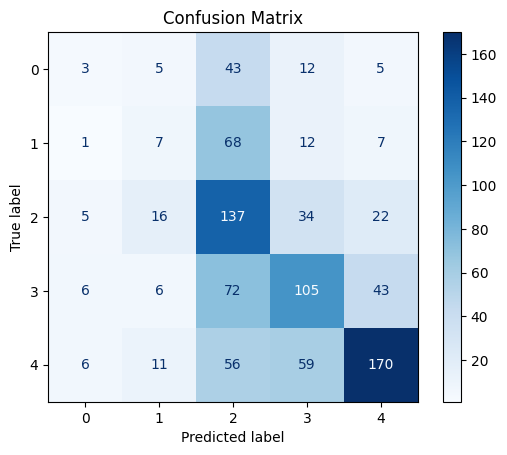

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

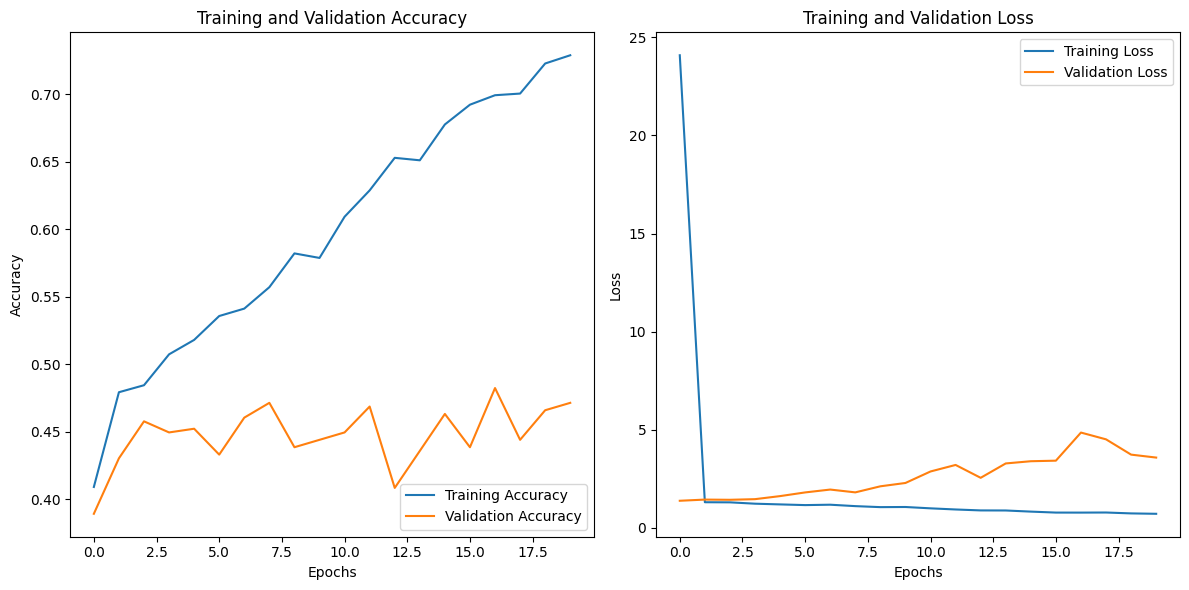

In [ ]:
plot_training_history(history)

## CNN with adam less Learning Rate

In [ ]:

from tensorflow.keras.optimizers import Adam
input_shape = (128, 128,3)

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.02),
    layers.Flatten(),
    #layers.Dense(8, activation = 'relu'),
    layers.Dense(5, activation= 'softmax'),
])
# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │         576,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,653 (2.49 MB)

 Trainable params: 651,653 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, to_categorical(Y_train, num_classes=5), epochs=20, validation_split=0.1)


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - Precision: 0.2763 - Recall: 0.2718 - accuracy: 0.2767 - loss: 12.8469 - val_Precision: 0.4050 - val_Recall: 0.4027 - val_accuracy: 0.4027 - val_loss: 6.0762
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - Precision: 0.3749 - Recall: 0.3681 - accuracy: 0.3746 - loss: 6.0186 - val_Precision: 0.4624 - val_Recall: 0.4384 - val_accuracy: 0.4438 - val_loss: 3.1384
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - Precision: 0.4085 - Recall: 0.3983 - accuracy: 0.4096 - loss: 4.9952 - val_Precision: 0.4221 - val_Recall: 0.4082 - val_accuracy: 0.4110 - val_loss: 4.4520
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - Precision: 0.4344 - Recall: 0.4247 - accuracy: 0.4315 - loss: 4.2611 - val_Precision: 0.4294 - val_Recall: 0.4164 - val_accuracy: 0.4301 - val_loss: 3.6494
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - Precision: 0.4685 - Recall: 0.4559 - accuracy: 0.4611 - loss: 3.8029 - val_Precision: 0.4609 - val_R

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=5))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - Precision: 0.6274 - Recall: 0.5867 - accuracy: 0.6128 - loss: 1.5811


[1.7996188402175903, 0.5828759670257568, 0.597189724445343, 0.5598243474960327]

In [ ]:
pred= model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.33      0.29      0.31        68
           1       0.47      0.55      0.50        95
           2       0.59      0.42      0.49       214
           3       0.48      0.82      0.61       232
           4       0.93      0.60      0.73       302

    accuracy                           0.58       911
   macro avg       0.56      0.53      0.53       911
weighted avg       0.64      0.58      0.59       911



array([[ 20,  17,  11,  20,   0],
       [ 17,  52,   6,  19,   1],
       [ 11,  18,  89,  88,   8],
       [  7,   7,  23, 190,   5],
       [  5,  17,  21,  79, 180]])

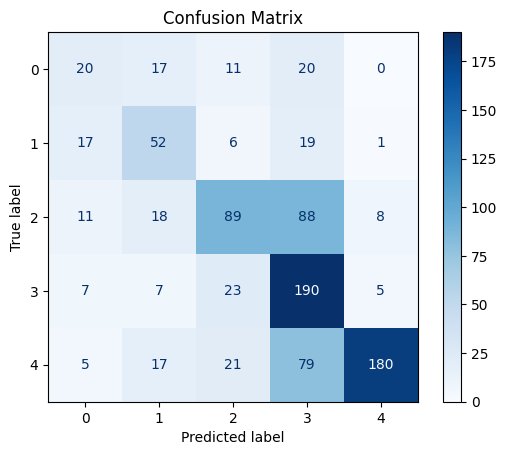

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

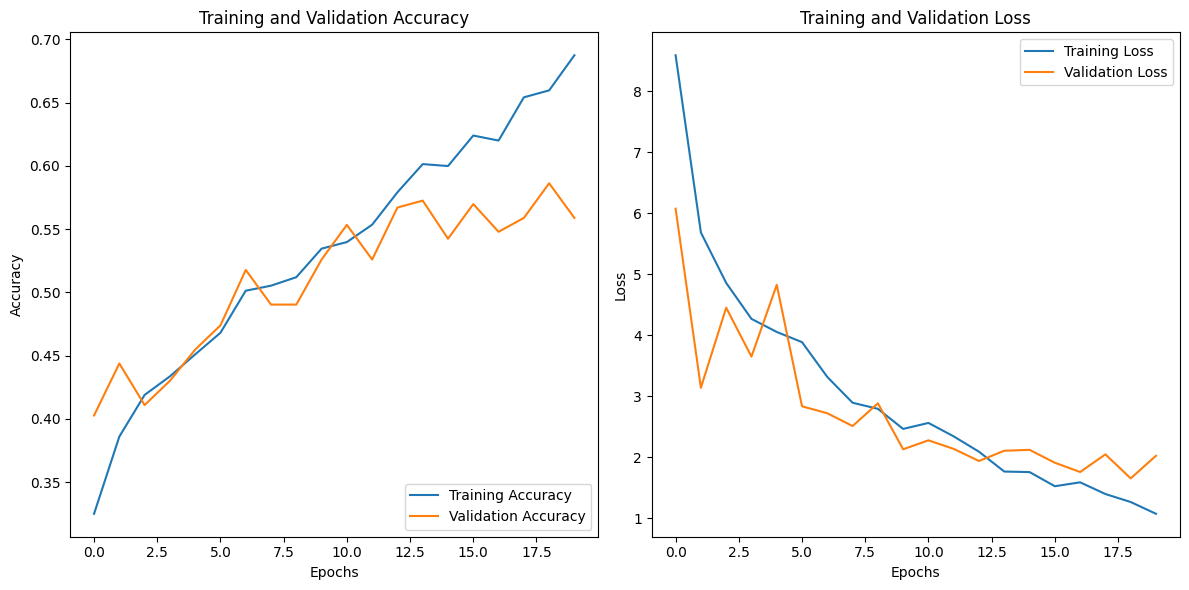

In [ ]:
plot_training_history(history)

## VGG-16

In [ ]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
# summarize the model
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))


In [ ]:

from tensorflow.keras.optimizers import Adam


# Freeze base model initially
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])


# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,301 (56.64 MB)

 Trainable params: 132,613 (518.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
VGG_history=model.fit(X_train, to_categorical(Y_train, num_classes=5), epochs=20,validation_split=0.1)

Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - Precision: 0.2507 - Recall: 0.2441 - accuracy: 0.2476 - loss: 8.0650 - val_Precision: 0.2832 - val_Recall: 0.2685 - val_accuracy: 0.2877 - val_loss: 4.3531
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - Precision: 0.2557 - Recall: 0.2500 - accuracy: 0.2527 - loss: 7.7133 - val_Precision: 0.3170 - val_Recall: 0.3014 - val_accuracy: 0.3178 - val_loss: 3.8807
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - Precision: 0.2599 - Recall: 0.2520 - accuracy: 0.2568 - loss: 6.9487 - val_Precision: 0.3552 - val_Recall: 0.3260 - val_accuracy: 0.3452 - val_loss: 3.5371
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - Precision: 0.2562 - Recall: 0.2478 - accuracy: 0.2548 - loss: 6.7595 - val_Precision: 0.3904 - val_Recall: 0.3562 - val_accuracy: 0.3890 - val_loss: 3.2372
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - Precision: 0.3082 - Recall: 0.2978 - accuracy: 0.3095 - loss: 6.2482 - val_Precision: 0.4018 - val_R

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=5))

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - Precision: 0.5638 - Recall: 0.4936 - accuracy: 0.5390 - loss: 1.7350


[1.9051612615585327,
 0.5071350336074829,
 0.5365239381790161,
 0.4676179885864258]

In [ ]:
pred= model.predict(X_test)
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.27      0.10      0.15        68
           1       0.34      0.36      0.35        95
           2       0.39      0.36      0.37       214
           3       0.49      0.47      0.48       232
           4       0.65      0.78      0.71       302

    accuracy                           0.51       911
   macro avg       0.43      0.41      0.41       911
weighted avg       0.49      0.51      0.49       911



array([[  7,  14,  17,  16,  14],
       [  2,  34,  24,  16,  19],
       [ 11,  27,  76,  48,  52],
       [  5,  19,  54, 110,  44],
       [  1,   6,  24,  36, 235]])

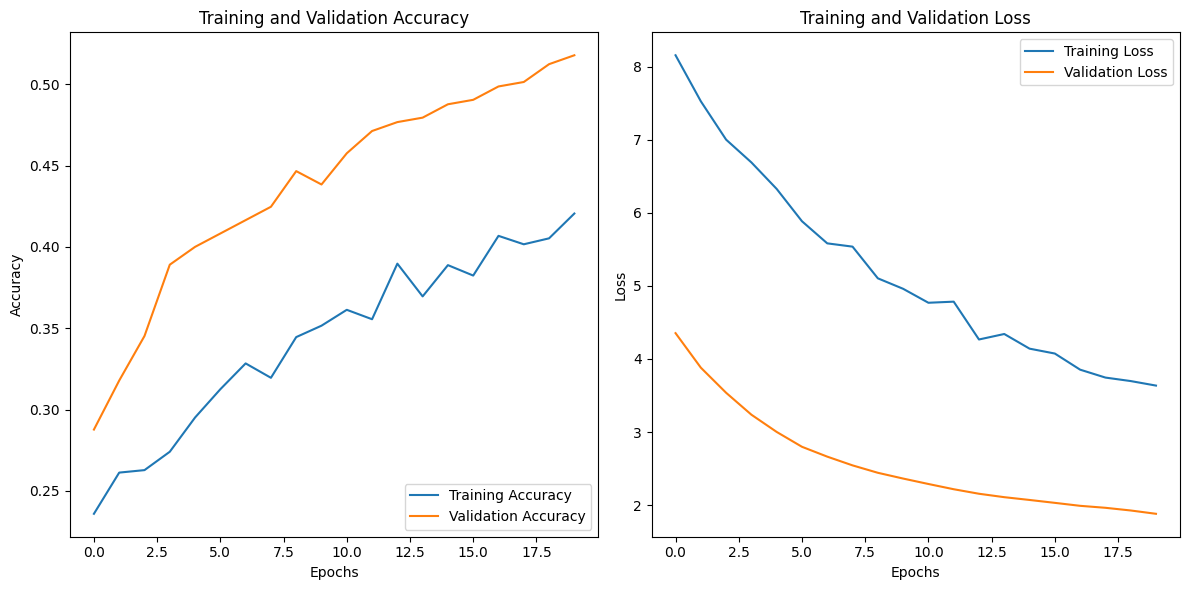

In [ ]:
plot_training_history(VGG_history)

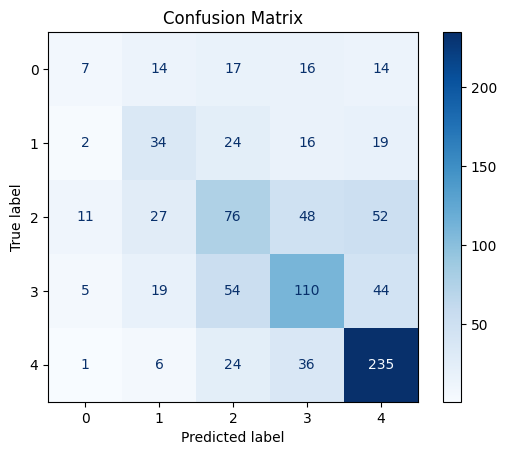

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Rest Net

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:



# Freeze base model initially
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])


# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## **MOdel Training**

In [ ]:
RessNet_history=model.fit(X_train, to_categorical(Y_train, num_classes=5), epochs=20,validation_split=0.1)

Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - Precision: 0.2369 - Recall: 0.1408 - accuracy: 0.2339 - loss: 2.1878 - val_Precision: 0.4769 - val_Recall: 0.1699 - val_accuracy: 0.3726 - val_loss: 1.4871
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - Precision: 0.3834 - Recall: 0.2273 - accuracy: 0.3319 - loss: 1.7992 - val_Precision: 0.6093 - val_Recall: 0.2521 - val_accuracy: 0.4822 - val_loss: 1.3381
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - Precision: 0.4477 - Recall: 0.2584 - accuracy: 0.3708 - loss: 1.6593 - val_Precision: 0.6685 - val_Recall: 0.3260 - val_accuracy: 0.5123 - val_loss: 1.2483
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - Precision: 0.5198 - Recall: 0.3092 - accuracy: 0.4324 - loss: 1.5062 - val_Precision: 0.6906 - val_Recall: 0.3425 - val_accuracy: 0.5397 - val_loss: 1.1880
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - Precision: 0.5381 - Recall: 0.3321 - accuracy: 0.4438 - loss: 1.4508 - val_Precision: 0.7166 - val_

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=5))

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - Precision: 0.7673 - Recall: 0.4912 - accuracy: 0.6308 - loss: 0.9156


[0.955117404460907,
 0.6245883703231812,
 0.7569060921669006,
 0.45115259289741516]

In [ ]:
pred= model.predict(X_test)
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.48      0.18      0.26        68
           1       0.56      0.45      0.50        95
           2       0.50      0.55      0.53       214
           3       0.61      0.61      0.61       232
           4       0.74      0.84      0.79       302

    accuracy                           0.62       911
   macro avg       0.58      0.53      0.54       911
weighted avg       0.61      0.62      0.61       911



array([[ 12,  11,  30,   6,   9],
       [  7,  43,  23,  13,   9],
       [  4,   8, 118,  44,  40],
       [  2,  10,  49, 141,  30],
       [  0,   5,  15,  27, 255]])

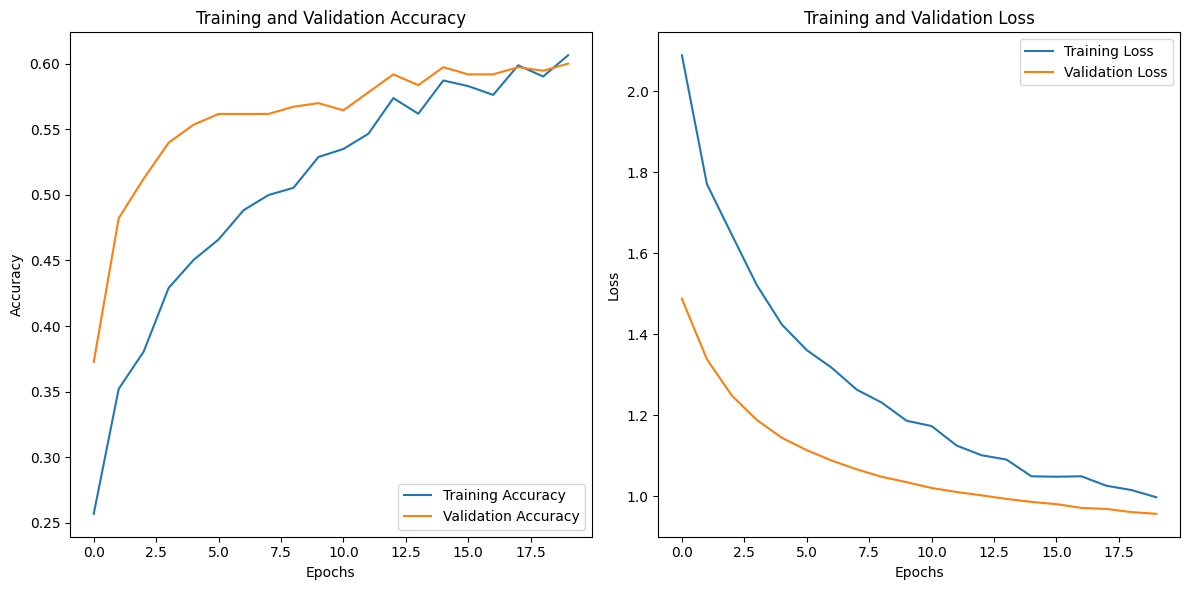

In [ ]:
plot_training_history(RessNet_history)

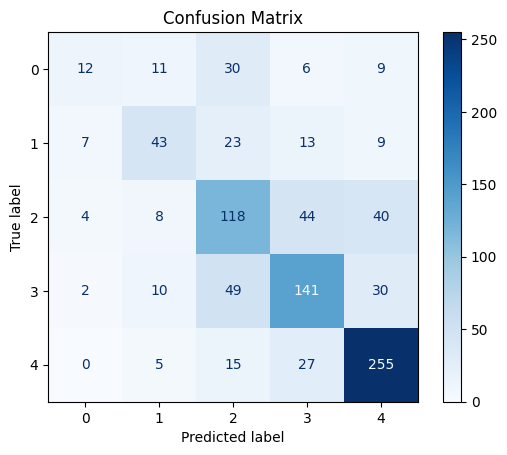

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **Balancing**


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from collections import Counter

# Step 1: Define paths
original_path = "/content/ham1000_data/classifiedImagesNew"  # Path to the original dataset
balanced_path = "content/Balanced"  # Path to save the balanced dataset

# Create the balanced dataset folder
if not os.path.exists(balanced_path):
    os.makedirs(balanced_path)

# Step 2: Load dataset and analyze class distribution
classes = [d for d in os.listdir(original_path) if os.path.isdir(os.path.join(original_path, d))]
class_counts = {}

for class_name in classes:
    class_folder = os.path.join(original_path, class_name)
    num_images = len(os.listdir(class_folder))
    class_counts[class_name] = num_images

print("Class distribution before balancing:", class_counts)

# Step 3: Define target size for balancing (maximum samples in any class)
max_count = max(class_counts.values())

# Step 4: Augment underrepresented classes
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

for class_name, count in class_counts.items():
    class_folder = os.path.join(original_path, class_name)
    balanced_class_folder = os.path.join(balanced_path, class_name)
    os.makedirs(balanced_class_folder, exist_ok=True)

    # Copy existing images to the balanced folder
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        save_path = os.path.join(balanced_class_folder, img_file)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        save_img(save_path, load_img(img_path))

    # Augment images if the class is underrepresented
    if count < max_count:
        images_to_generate = max_count - count
        print(f"Augmenting {images_to_generate} images for class: {class_name}")

        img_files = os.listdir(class_folder)
        for i in range(images_to_generate):
            # Load a random image for augmentation
            img_file = img_files[i % len(img_files)]  # Loop over images if needed
            img_path = os.path.join(class_folder, img_file)

            img = load_img(img_path)  # Load the image
            img_array = img_to_array(img)  # Convert to NumPy array
            img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for augmentation

            # Generate augmented images
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=balanced_class_folder, save_prefix="aug", save_format="jpeg"):
                break  # Generate one image per iteration

print("Dataset balanced using data augmentation!")

# Step 5: Verify the balanced dataset
balanced_counts = {class_name: len(os.listdir(os.path.join(balanced_path, class_name))) for class_name in classes}
print("Class distribution after balancing:", balanced_counts)


Class distribution before balancing: {'MEL': 1113, 'AKIEC': 327, 'BKL': 1099, 'NV': 1500, 'BCC': 514}
Augmenting 387 images for class: MEL
Augmenting 1173 images for class: AKIEC
Augmenting 401 images for class: BKL
Augmenting 986 images for class: BCC
Dataset balanced using data augmentation!
Class distribution after balancing: {'MEL': 1494, 'AKIEC': 1449, 'BKL': 1489, 'NV': 1500, 'BCC': 1455}


# Results

## CNN

In [ ]:


# Define the path to the dataset folder
dataset_path = "/content/content/Balanced"


# Define the list of label folders in the dataset folder
label_folders = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL' ]

# Define the size of the input images
img_height = 128
img_width = 128

# Define an empty list to store the images and their labels
data = []
labels = []

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)
        labels.append(label_folder)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels)

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (7387, 128, 128, 3)
Labels shape: (7387,)


In [ ]:


# Get the unique string values
unique_values = np.unique(labels)

# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Map the string values to numbers
mapped_arr = np.array([mapping[value] for value in labels])

print("Original array:", labels)
print("Mapped array:", mapped_arr)
print("Mapping dictionary:", mapping)


Original array: ['MEL' 'MEL' 'MEL' ... 'BKL' 'BKL' 'BKL']
Mapped array: [3 3 3 ... 2 2 2]
Mapping dictionary: {'AKIEC': 0, 'BCC': 1, 'BKL': 2, 'MEL': 3, 'NV': 4}


In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(data,mapped_arr, test_size = 0.2,random_state=0,shuffle=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
input_shape = (128, 128,3)

model = models.Sequential([
    layers.Conv2D(128, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.02),
    layers.Flatten(),
    #layers.Dense(8, activation = 'relu'),
    layers.Dense(5, activation= 'softmax'),
])
#model.build(input_shape=input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 5)                   │         288,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,381 (1.39 MB)

 Trainable params: 365,381 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, to_categorical(Y_train, num_classes=5), epochs=20, validation_split=0.1)


Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - Precision: 0.2422 - Recall: 0.0425 - accuracy: 0.2222 - loss: 67.1665 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.2183 - val_loss: 1.6094
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - Precision: 0.5186 - Recall: 0.0026 - accuracy: 0.2055 - loss: 1.6173 - val_Precision: 0.5000 - val_Recall: 0.0017 - val_accuracy: 0.2149 - val_loss: 1.6075
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - Precision: 0.6566 - Recall: 0.0054 - accuracy: 0.2021 - loss: 1.5967 - val_Precision: 0.5385 - val_Recall: 0.0118 - val_accuracy: 0.2335 - val_loss: 1.6019
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - Precision: 0.6234 - Recall: 0.0101 - accuracy: 0.2086 - loss: 1.5984 - val_Precision: 0.5714 - val_Recall: 0.0068 - val_accuracy: 0.2250 - val_loss: 1.6061
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - Precision: 0.7289 - Recall: 0.0114 - accuracy: 0.2253 - loss: 1.5916 - val_Precision: 0.66

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=5))

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - Precision: 0.3599 - Recall: 0.0320 - accuracy: 0.2203 - loss: 1.8807


[1.9633222818374634,
 0.2225981056690216,
 0.3692307770252228,
 0.03247632086277008]

In [ ]:
pred= model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.20      0.92      0.33       276
           1       0.18      0.02      0.04       306
           2       0.30      0.05      0.08       299
           3       0.44      0.16      0.23       285
           4       0.30      0.04      0.06       312

    accuracy                           0.22      1478
   macro avg       0.28      0.24      0.15      1478
weighted avg       0.28      0.22      0.14      1478



array([[253,   7,   5,   9,   2],
       [286,   6,   2,   9,   3],
       [251,   4,  14,  23,   7],
       [193,  11,  22,  45,  14],
       [275,   5,   4,  17,  11]])

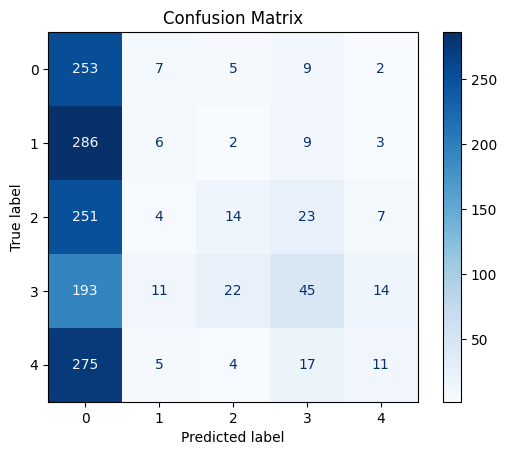

In [ ]:


# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

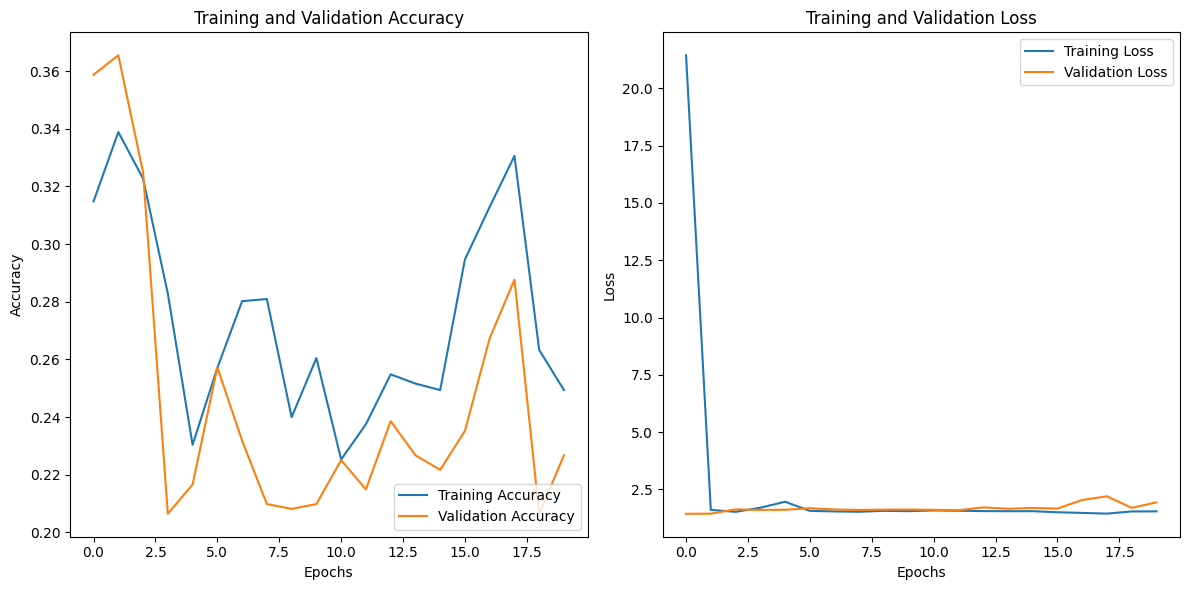

In [ ]:
plot_training_history(history)

## CNN with adam less Learning Rate

In [ ]:

from tensorflow.keras.optimizers import Adam
input_shape = (128, 128,3)

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.02),
    layers.Flatten(),
    #layers.Dense(8, activation = 'relu'),
    layers.Dense(5, activation= 'softmax'),
])
# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │         576,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,653 (2.49 MB)

 Trainable params: 651,653 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, to_categorical(Y_train, num_classes=5), epochs=20, validation_split=0.1)


Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - Precision: 0.2510 - Recall: 0.2467 - accuracy: 0.2508 - loss: 12.0777 - val_Precision: 0.4219 - val_Recall: 0.4112 - val_accuracy: 0.4162 - val_loss: 4.3257
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - Precision: 0.3344 - Recall: 0.3293 - accuracy: 0.3337 - loss: 6.9520 - val_Precision: 0.3488 - val_Recall: 0.3435 - val_accuracy: 0.3469 - val_loss: 6.2543
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - Precision: 0.3805 - Recall: 0.3740 - accuracy: 0.3770 - loss: 6.2408 - val_Precision: 0.4595 - val_Recall: 0.4416 - val_accuracy: 0.4484 - val_loss: 2.8419
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - Precision: 0.3984 - Recall: 0.3867 - accuracy: 0.3951 - loss: 4.8228 - val_Precision: 0.4869 - val_Recall: 0.4721 - val_accuracy: 0.4805 - val_loss: 2.7482
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - Precision: 0.4312 - Recall: 0.4192 - accuracy: 0.4282 - loss: 4.3888 - val_Precision: 0.4738 - v

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=5))

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - Precision: 0.5630 - Recall: 0.5141 - accuracy: 0.5396 - loss: 1.7609


[1.6568033695220947,
 0.5446549654006958,
 0.5634218454360962,
 0.5169147253036499]

In [ ]:
pred= model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

In [ ]:

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.41      0.74      0.53       276
           1       0.55      0.40      0.47       306
           2       0.51      0.34      0.41       299
           3       0.55      0.47      0.51       285
           4       0.75      0.78      0.77       312

    accuracy                           0.54      1478
   macro avg       0.56      0.55      0.54      1478
weighted avg       0.56      0.54      0.54      1478



array([[203,  39,  12,  16,   6],
       [142, 123,  19,  12,  10],
       [ 81,  33, 101,  47,  37],
       [ 56,  22,  46, 135,  26],
       [ 11,   5,  19,  34, 243]])

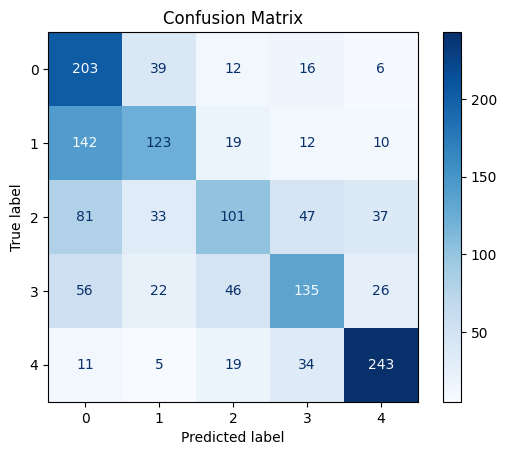

In [ ]:

# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

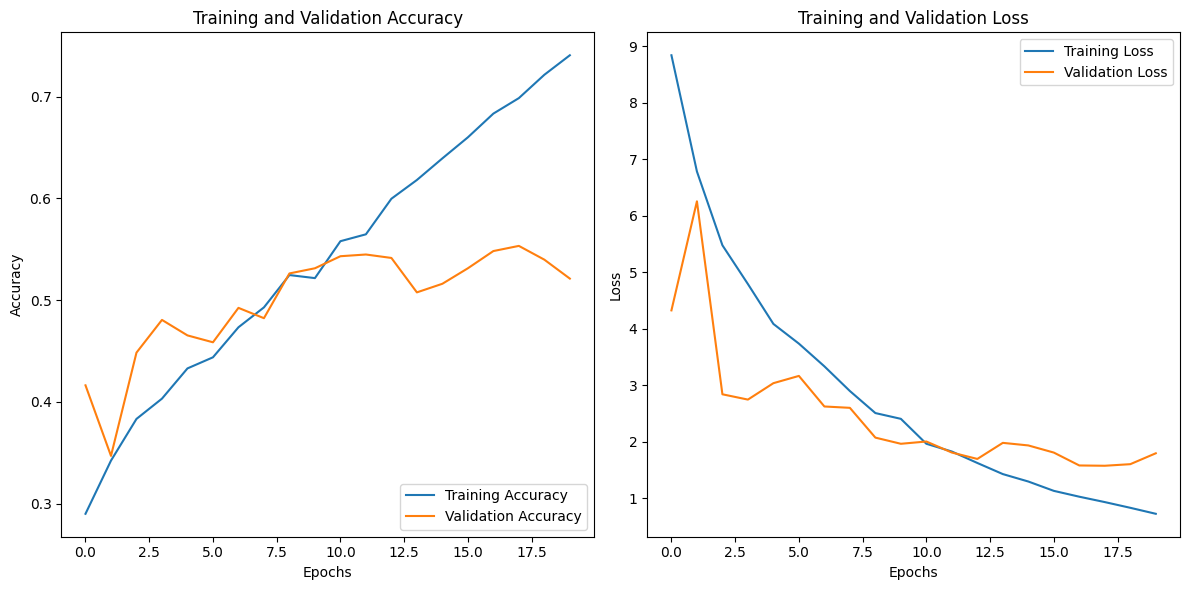

In [ ]:
plot_training_history(history)

## VGG-16

In [ ]:

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))


In [ ]:

# Freeze base model initially
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])


# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,301 (56.64 MB)

 Trainable params: 132,613 (518.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
VGG_history=model.fit(X_train, to_categorical(Y_train, num_classes=5), epochs=20,validation_split=0.1)

Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - Precision: 0.1990 - Recall: 0.1954 - accuracy: 0.1975 - loss: 10.9014 - val_Precision: 0.2756 - val_Recall: 0.2504 - val_accuracy: 0.2775 - val_loss: 4.8082
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - Precision: 0.2283 - Recall: 0.2225 - accuracy: 0.2265 - loss: 8.7486 - val_Precision: 0.3614 - val_Recall: 0.3266 - val_accuracy: 0.3469 - val_loss: 3.9332
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - Precision: 0.2451 - Recall: 0.2385 - accuracy: 0.2452 - loss: 7.9189 - val_Precision: 0.3895 - val_Recall: 0.3519 - val_accuracy: 0.3739 - val_loss: 3.4404
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - Precision: 0.2813 - Recall: 0.2745 - accuracy: 0.2801 - loss: 7.1042 - val_Precision: 0.4130 - val_Recall: 0.3773 - val_accuracy: 0.4044 - val_loss: 3.0926
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - Precision: 0.3081 - Recall: 0.3005 - accuracy: 0.3066 - loss: 6.4515 - val_Precision: 0.4299 - va

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=5))

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - Precision: 0.5359 - Recall: 0.4746 - accuracy: 0.5135 - loss: 1.8696


[1.8523372411727905,
 0.5162381529808044,
 0.5367702841758728,
 0.4790257215499878]

In [ ]:
pred= model.predict(X_test)
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


In [ ]:

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.50      0.55      0.52       276
           1       0.51      0.48      0.49       306
           2       0.39      0.29      0.33       299
           3       0.45      0.48      0.47       285
           4       0.68      0.76      0.72       312

    accuracy                           0.52      1478
   macro avg       0.50      0.51      0.51      1478
weighted avg       0.51      0.52      0.51      1478



array([[153,  65,  32,  18,   8],
       [ 76, 148,  31,  32,  19],
       [ 49,  40,  86,  77,  47],
       [ 27,  29,  53, 138,  38],
       [  3,  10,  20,  41, 238]])

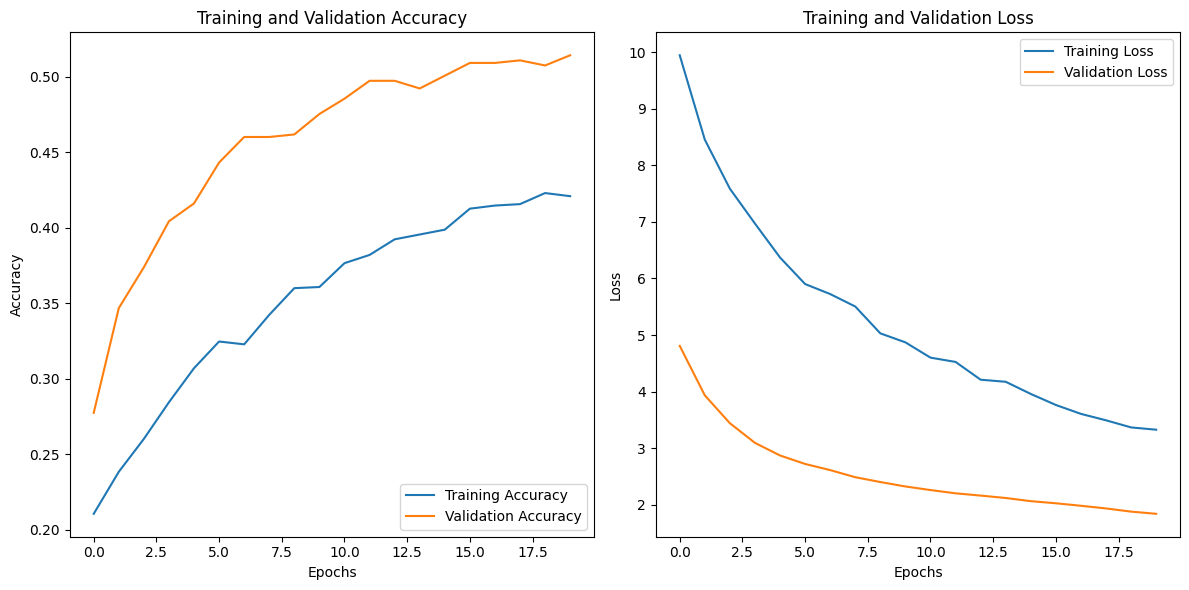

In [ ]:
plot_training_history(VGG_history)

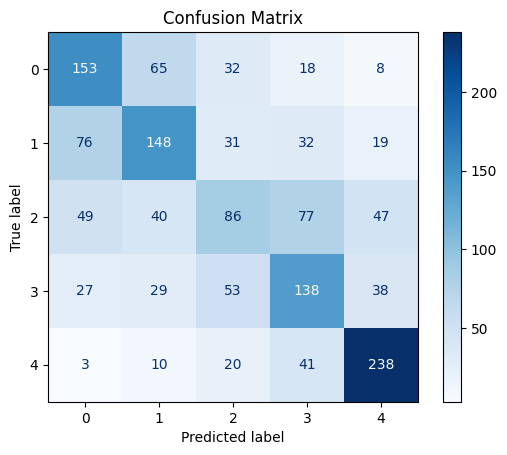

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Rest Net

In [ ]:


# Load the ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

In [ ]:



# Freeze base model initially
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])


# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## **MOdel Training**

In [ ]:
RessNet_history=model.fit(X_train, to_categorical(Y_train, num_classes=5), epochs=20,validation_split=0.1)

Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 86ms/step - Precision: 0.2461 - Recall: 0.1500 - accuracy: 0.2343 - loss: 2.3251 - val_Precision: 0.5285 - val_Recall: 0.1726 - val_accuracy: 0.3756 - val_loss: 1.5040
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - Precision: 0.3510 - Recall: 0.1982 - accuracy: 0.3144 - loss: 1.8582 - val_Precision: 0.5812 - val_Recall: 0.2301 - val_accuracy: 0.4281 - val_loss: 1.3364
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - Precision: 0.4413 - Recall: 0.2562 - accuracy: 0.3827 - loss: 1.6193 - val_Precision: 0.6316 - val_Recall: 0.2843 - val_accuracy: 0.4619 - val_loss: 1.2420
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - Precision: 0.4985 - Recall: 0.2924 - accuracy: 0.4200 - loss: 1.5105 - val_Precision: 0.6567 - val_Recall: 0.2978 - val_accuracy: 0.5008 - val_loss: 1.1843
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - Precision: 0.5071 - Recall: 0.2945 - accuracy: 0.4322 - loss: 1.4431 - val_Precision: 0.6763 - val_

In [ ]:
model.evaluate(X_test,to_categorical(Y_test, num_classes=5))

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - Precision: 0.7541 - Recall: 0.4208 - accuracy: 0.6597 - loss: 0.9224


[0.9434075951576233, 0.6346414089202881, 0.75, 0.41407307982444763]

In [ ]:
pred= model.predict(X_test)
# ypred=(pred > 0.5).astype(int)
ypred=pred.argmax(axis=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step


In [ ]:

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.60      0.66      0.63       276
           1       0.63      0.66      0.65       306
           2       0.60      0.43      0.50       299
           3       0.54      0.65      0.59       285
           4       0.80      0.77      0.78       312

    accuracy                           0.63      1478
   macro avg       0.64      0.63      0.63      1478
weighted avg       0.64      0.63      0.63      1478



array([[181,  43,  28,  20,   4],
       [ 63, 203,  18,  17,   5],
       [ 38,  40, 130,  63,  28],
       [ 18,  25,  33, 185,  24],
       [  1,   9,   8,  55, 239]])

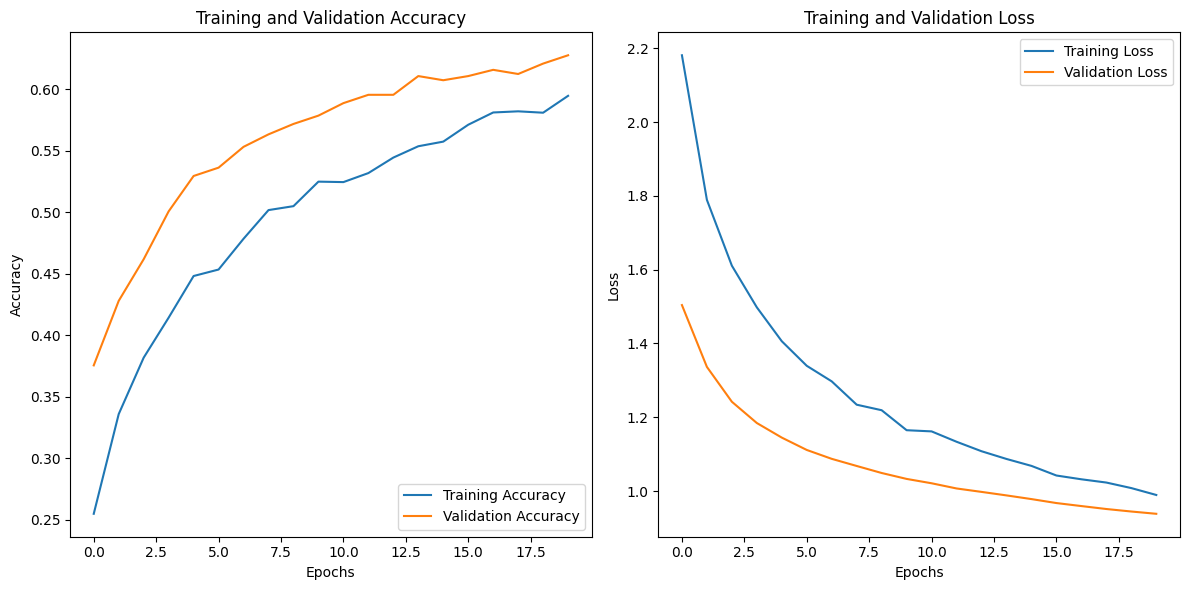

In [ ]:
plot_training_history(RessNet_history)

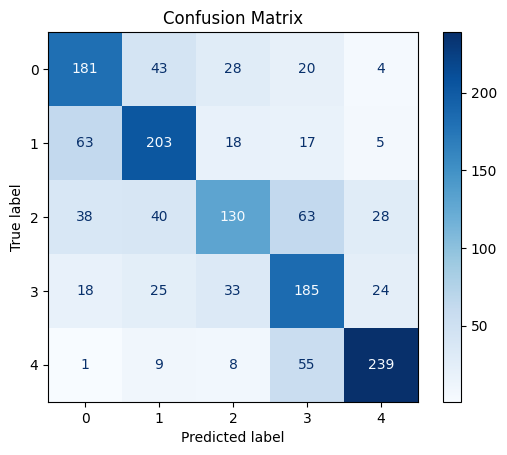

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test,ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **Feature Extraction**

In [ ]:
base_model=ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

In [ ]:
input_shape = (128, 128,3)

In [ ]:
model = models.Sequential([
    layers.Conv2D(128, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.02),
    layers.Flatten(),
    #layers.Dense(8, activation = 'relu'),
    layers.Dense(500, activation= 'softmax'),
])

In [ ]:


# Define the path to the dataset folder
dataset_path = "/content/ham1000_data/classifiedImagesNew"


# Define the list of label folders in the dataset folder
label_folders = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL' ]

# Define the size of the input images
img_height = 128
img_width = 128

# Define an empty list to store the images and their labels


# Initialize an empty DataFrame to store the results
df1 = pd.DataFrame()
# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    data = []
    labels = []
    features=[]
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)

        labels.append(label_folder)

    data = np.array(data)
    labels = np.array(labels)
    features_train = model.predict(data)
    # features.append(features_train)
    df=pd.DataFrame(features_train)
    df['Label']=labels
    df1=pd.concat([df1,df],axis=0)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,Label
0,0.000000e+00,2.260704e-37,2.277196e-26,7.986000e-42,9.116440e-26,9.872652e-40,2.169358e-30,1.880300e-34,4.468319e-28,8.790969e-19,...,0.0,1.016625e-39,1.439523e-39,5.583768e-34,2.161153e-33,1.742795e-41,4.921374e-38,4.543105e-34,2.802597e-45,MEL
1,0.000000e+00,1.193860e-39,4.769223e-29,1.989844e-43,4.307196e-25,4.347192e-40,6.482720e-30,6.942795e-32,8.657575e-31,4.997188e-14,...,0.0,7.057219e-41,1.338709e-38,1.223783e-36,1.097014e-33,8.407791e-45,1.891387e-36,6.782431e-32,2.662467e-44,MEL
2,1.093013e-42,1.669169e-39,3.641540e-27,8.102728e-41,1.065513e-27,1.546109e-40,4.276410e-24,5.126041e-34,1.920497e-25,2.222927e-16,...,0.0,7.070924e-37,1.536048e-35,2.573423e-31,7.597022e-31,1.401298e-44,8.084504e-35,1.045627e-33,0.000000e+00,MEL
3,2.217210e-39,1.070488e-34,3.323760e-23,5.735914e-38,8.317198e-23,1.384905e-37,1.478369e-22,1.154491e-29,4.315160e-27,3.328858e-17,...,0.0,3.041063e-37,2.534541e-31,3.995036e-31,2.259389e-32,4.583815e-40,3.952842e-34,1.280519e-31,2.045896e-42,MEL
4,1.387285e-42,4.102764e-36,5.287681e-22,6.552913e-39,5.983387e-23,3.208598e-36,6.110074e-27,5.562275e-32,1.406932e-25,3.554080e-18,...,0.0,5.861496e-34,3.577664e-35,8.015698e-32,1.962700e-30,6.013363e-38,2.942290e-34,2.867479e-30,7.973388e-43,MEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2.802597e-45,1.421722e-36,4.856453e-28,7.426882e-44,5.555000e-24,1.589605e-40,2.945332e-26,1.800371e-32,3.481081e-27,5.563802e-16,...,0.0,4.785168e-40,1.346068e-38,1.457578e-33,5.692482e-32,1.799267e-42,5.669135e-35,1.180680e-33,8.239635e-43,BKL
1095,0.000000e+00,1.246828e-37,2.736698e-27,1.653532e-43,9.029445e-24,1.183733e-40,3.709162e-28,1.276614e-31,5.301468e-28,8.734625e-17,...,0.0,1.238888e-40,1.299636e-37,4.477485e-35,4.931855e-34,1.359260e-43,5.783122e-35,3.989373e-32,1.401298e-45,BKL
1096,0.000000e+00,6.437705e-41,4.090528e-28,4.203895e-45,1.784696e-28,4.606068e-42,5.260937e-31,4.900619e-35,1.511494e-30,3.785922e-20,...,0.0,1.681558e-42,2.047297e-42,8.941484e-37,3.048892e-36,2.802597e-45,4.321441e-39,3.192973e-34,0.000000e+00,BKL
1097,2.802597e-45,1.314846e-34,1.290872e-25,9.773875e-40,6.695678e-26,1.066724e-37,3.622738e-28,5.043532e-33,1.340943e-25,3.663128e-17,...,0.0,2.720391e-38,2.362924e-36,2.038084e-31,1.693737e-29,8.045653e-40,1.040641e-33,1.624896e-32,8.267661e-44,BKL


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()


In [ ]:
X=df1.drop('Label',axis=1)
y=df1['Label']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)


In [ ]:
X_train.shape

(3642, 500)

In [ ]:
# Apply label encoding to the 'Label' column
df1['Label'] = label_encoder.fit_transform(df1['Label'])


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Train the Decision Tree Classifier
lr = DecisionTreeClassifier(random_state=0,max_depth=300)
start = time.time()
model = lr.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

# Make predictions on the test set
lr_predict = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)  # Get predicted probabilities
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)


Training time: 0.20523643493652344s


In [ ]:
# Print results
print("Confusion matrix:")
print(lr_conf_matrix)
print("\n")
score_lr = lr_acc_score * 100
print("Accuracy of DecisionTreeClassifier:", score_lr, '\n')
print(classification_report(y_test, lr_predict))


Confusion matrix:
[[  8  12  14  15  19]
 [ 12  10  32  18  23]
 [ 14  28  75  53  44]
 [ 20  27  60  70  55]
 [ 14  23  43  41 181]]


Accuracy of DecisionTreeClassifier: 37.76070252469814 

              precision    recall  f1-score   support

           0       0.12      0.12      0.12        68
           1       0.10      0.11      0.10        95
           2       0.33      0.35      0.34       214
           3       0.36      0.30      0.33       232
           4       0.56      0.60      0.58       302

    accuracy                           0.38       911
   macro avg       0.29      0.29      0.29       911
weighted avg       0.37      0.38      0.38       911



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train the RandomForestClassifier
lr = RandomForestClassifier(random_state=0, max_depth=300,max_leaf_nodes=200)
start = time.time()
model = lr.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

# Make predictions
lr_predict = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

# Print results
print("Confusion matrix")
print(lr_conf_matrix)
print("\n")
score_lr = lr_acc_score * 100
print("Accuracy of Random Forest:", score_lr, '\n')
print(classification_report(y_test, lr_predict))


Training time: 0.8852503299713135s
Confusion matrix
[[  0   2  23   8  35]
 [  0   4  33  13  45]
 [  0   5 111  37  61]
 [  0   3  60  94  75]
 [  0   1  21  33 247]]


Accuracy of Random Forest: 50.054884742041715 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.27      0.04      0.07        95
           2       0.45      0.52      0.48       214
           3       0.51      0.41      0.45       232
           4       0.53      0.82      0.65       302

    accuracy                           0.50       911
   macro avg       0.35      0.36      0.33       911
weighted avg       0.44      0.50      0.45       911

